In [13]:
import numpy as np
import matplotlib.pyplot as plt

# Cesàro Mean Analysis
# For a sequence {a_n}, the Cesàro mean is: b_n = (1/n) * sum(a_k) for k=1 to n

print("="*70)
print("CESÀRO MEAN ANALYSIS")
print("="*70)

def compute_cesaro_mean(a_n):
    """
    Compute the Cesàro mean of a sequence.

    Parameters:
    -----------
    a_n : numpy.ndarray
        The sequence {a_n}

    Returns:
    --------
    numpy.ndarray : The Cesàro mean sequence {b_n}
    """
    n = len(a_n)
    b_n = np.zeros(n)

    cumsum = 0
    for i in range(n):
        cumsum += a_n[i]
        b_n[i] = cumsum / (i + 1)

    return b_n

def plot_sequence_and_cesaro(a_n, b_n, title, sequence_label):
    """
    Plot a sequence and its Cesàro mean.

    Parameters:
    -----------
    a_n : numpy.ndarray
        Original sequence
    b_n : numpy.ndarray
        Cesàro mean sequence
    title : str
        Plot title
    sequence_label : str
        Label for the sequence
    """
    n = np.arange(1, len(a_n) + 1)

    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(14, 10))

    # Plot original sequence
    ax1.plot(n, a_n, 'b-', linewidth=1, alpha=0.7, label=f'$a_n$ = {sequence_label}')
    ax1.axhline(y=0, color='black', linestyle='-', linewidth=0.5, alpha=0.3)
    ax1.set_xlabel('n', fontsize=12)
    ax1.set_ylabel('$a_n$', fontsize=12)
    ax1.set_title(f'Original Sequence: $a_n$ = {sequence_label}', fontsize=13, fontweight='bold')
    ax1.legend(fontsize=11)
    ax1.grid(True, alpha=0.3)

    # Plot Cesàro mean
    ax2.plot(n, b_n, 'r-', linewidth=2, label=r'$b_n = \frac{1}{n}\sum_{k=1}^{n} a_k$')
    ax2.axhline(y=0, color='black', linestyle='-', linewidth=0.5, alpha=0.3)

    # Add horizontal line at limit if it exists
    if len(b_n) > 50:
        limit_estimate = b_n[-1]
        ax2.axhline(y=limit_estimate, color='green', linestyle='--', linewidth=2,
                   label=f'Limit ≈ {limit_estimate:.6f}')

    ax2.set_xlabel('n', fontsize=12)
    ax2.set_ylabel('$b_n$', fontsize=12)
    ax2.set_title(r'Cesàro Mean: $b_n = \frac{1}{n}\sum_{k=1}^{n} a_k$',
                 fontsize=13, fontweight='bold')
    ax2.legend(fontsize=11)
    ax2.grid(True, alpha=0.3)

    plt.suptitle(title, fontsize=15, fontweight='bold', y=0.995)
    plt.tight_layout()
    plt.show()


CESÀRO MEAN ANALYSIS



(a) Analysis of sequences:
----------------------------------------------------------------------

Sequence 1: a_n = 1/n
  First few terms of a_n: [1.         0.5        0.33333333 0.25       0.2       ]
  First few terms of b_n: [1.         0.75       0.61111111 0.52083333 0.45666667]
  Last few terms of b_n: [0.02988714 0.02976119 0.02963639 0.02951272 0.02939015]
  b_200 = 0.0293901547


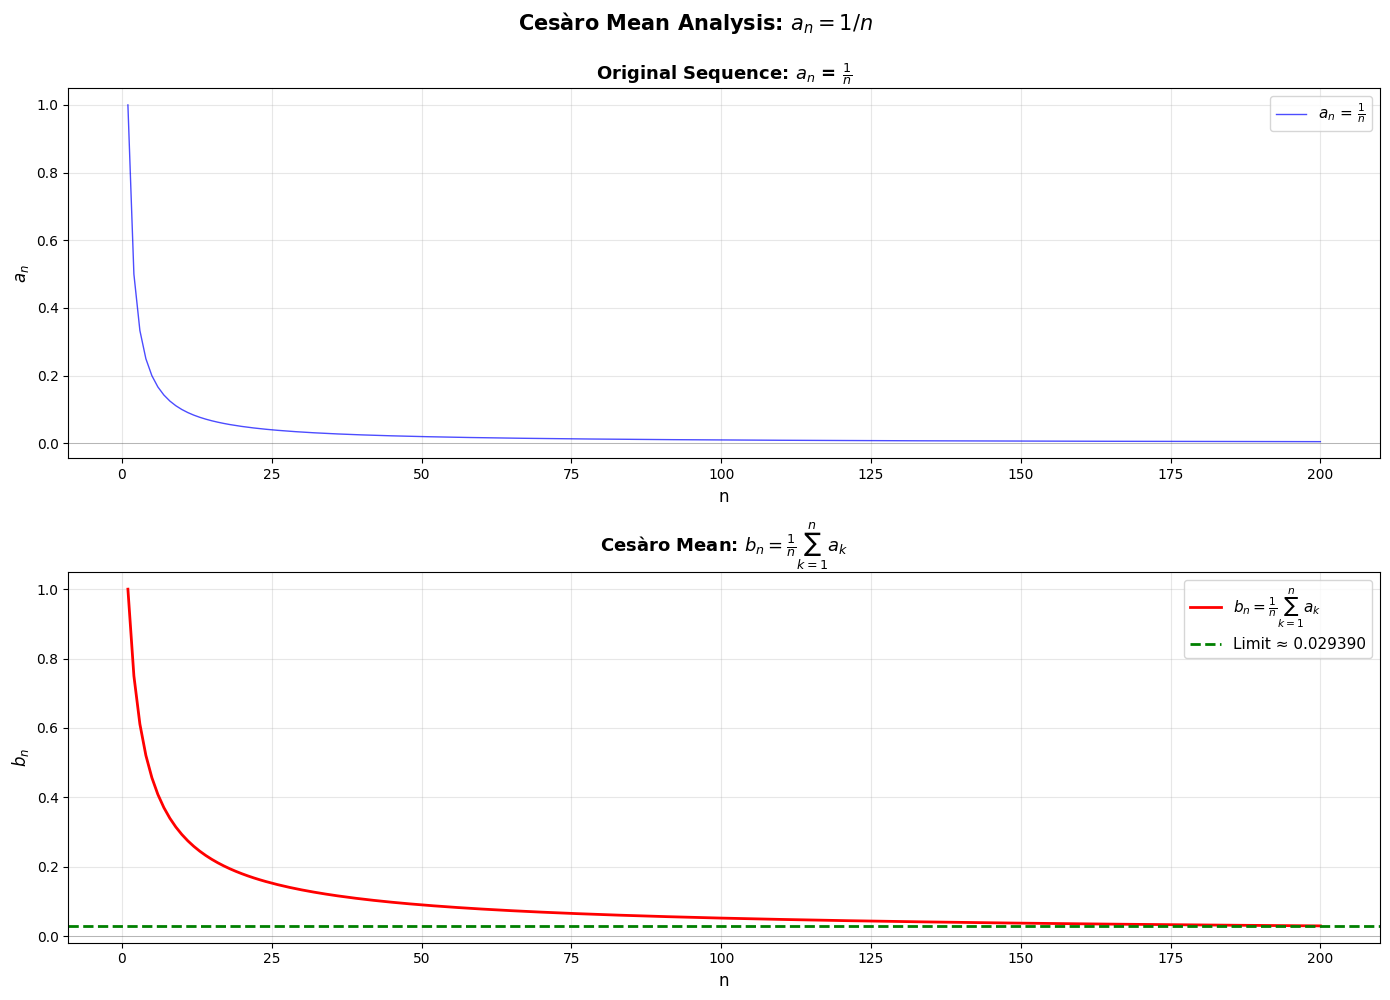

In [14]:
# (a) Compute and plot for the first 200 terms

# Sequence 1: a_n = 1/n
print("\n(a) Analysis of sequences:")
print("-" * 70)

n_terms = 200
n = np.arange(1, n_terms + 1)

# Sequence 1: a_n = 1/n
a_n_1 = 1 / n
b_n_1 = compute_cesaro_mean(a_n_1)

print("\nSequence 1: a_n = 1/n")
print(f"  First few terms of a_n: {a_n_1[:5]}")
print(f"  First few terms of b_n: {b_n_1[:5]}")
print(f"  Last few terms of b_n: {b_n_1[-5:]}")
print(f"  b_200 = {b_n_1[-1]:.10f}")

plot_sequence_and_cesaro(a_n_1, b_n_1,
                         'Cesàro Mean Analysis: $a_n = 1/n$',
                         r'$\frac{1}{n}$')



Sequence 2: a_n = (-1)^n
  First few terms of a_n: [-1  1 -1  1 -1  1 -1  1 -1  1]
  First few terms of b_n: [-1.          0.         -0.33333333  0.         -0.2         0.
 -0.14285714  0.         -0.11111111  0.        ]
  Last few terms of b_n: [ 0.         -0.00507614  0.         -0.00502513  0.        ]
  b_200 = 0.0000000000


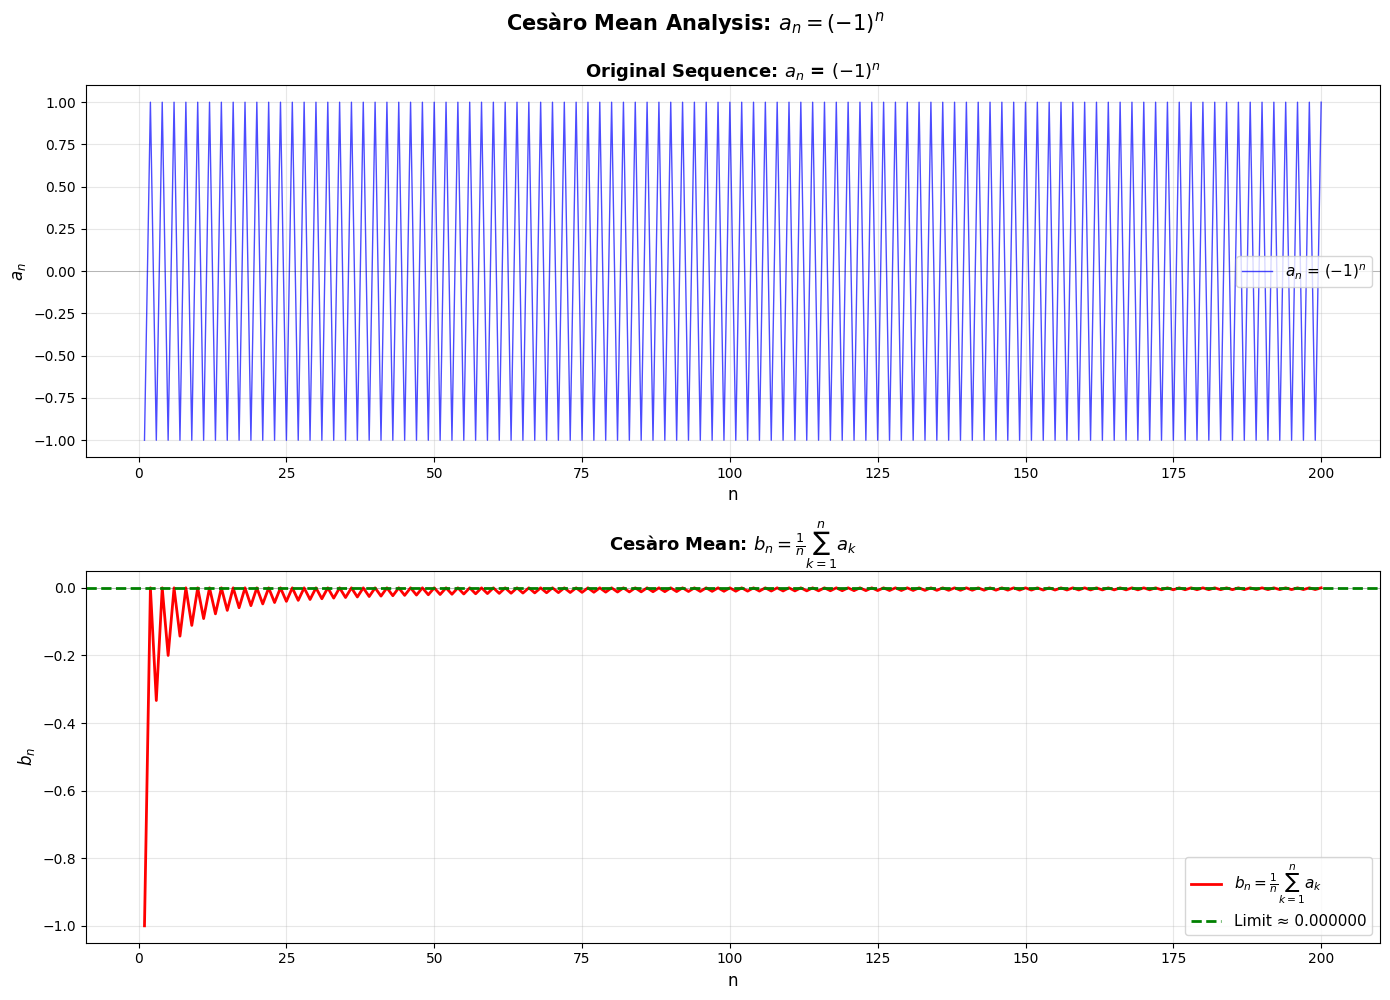

In [11]:
# Sequence 2: a_n = (-1)^n
a_n_2 = (-1)**n
b_n_2 = compute_cesaro_mean(a_n_2)

print("\nSequence 2: a_n = (-1)^n")
print(f"  First few terms of a_n: {a_n_2[:10]}")
print(f"  First few terms of b_n: {b_n_2[:10]}")
print(f"  Last few terms of b_n: {b_n_2[-5:]}")
print(f"  b_200 = {b_n_2[-1]:.10f}")

plot_sequence_and_cesaro(a_n_2, b_n_2,
                         'Cesàro Mean Analysis: $a_n = (-1)^n$',
                         r'$(-1)^n$')



(b) RELATION BETWEEN CONVERGENCE OF {a_n} AND {b_n}

Analysis of Sequence 1: a_n = 1/n
----------------------------------------------------------------------
• Original sequence {a_n}:
    a_n = 1/n → 0 as n → ∞
    ✓ The sequence {a_n} CONVERGES to 0

• Cesàro mean {b_n}:
    b_n = (1/n) * sum(1/k for k=1 to n)
    b_n = (1/n) * H_n, where H_n is the n-th harmonic number
    Since H_n ~ ln(n), we have b_n ~ ln(n)/n → 0 as n → ∞
    b_200 = 0.0293901547
    ✓ The Cesàro mean {b_n} CONVERGES to 0

----------------------------------------------------------------------
Analysis of Sequence 2: a_n = (-1)^n
----------------------------------------------------------------------
• Original sequence {a_n}:
    a_n = (-1)^n oscillates between -1 and +1
    ✗ The sequence {a_n} DIVERGES (does not converge)

• Cesàro mean {b_n}:
    For even n: sum = 0, so b_n = 0
    For odd n: sum = -1, so b_n = -1/n → 0
    b_200 = 0.0000000000
    ✓ The Cesàro mean {b_n} CONVERGES to 0

CONCLUSION: RELATIONS

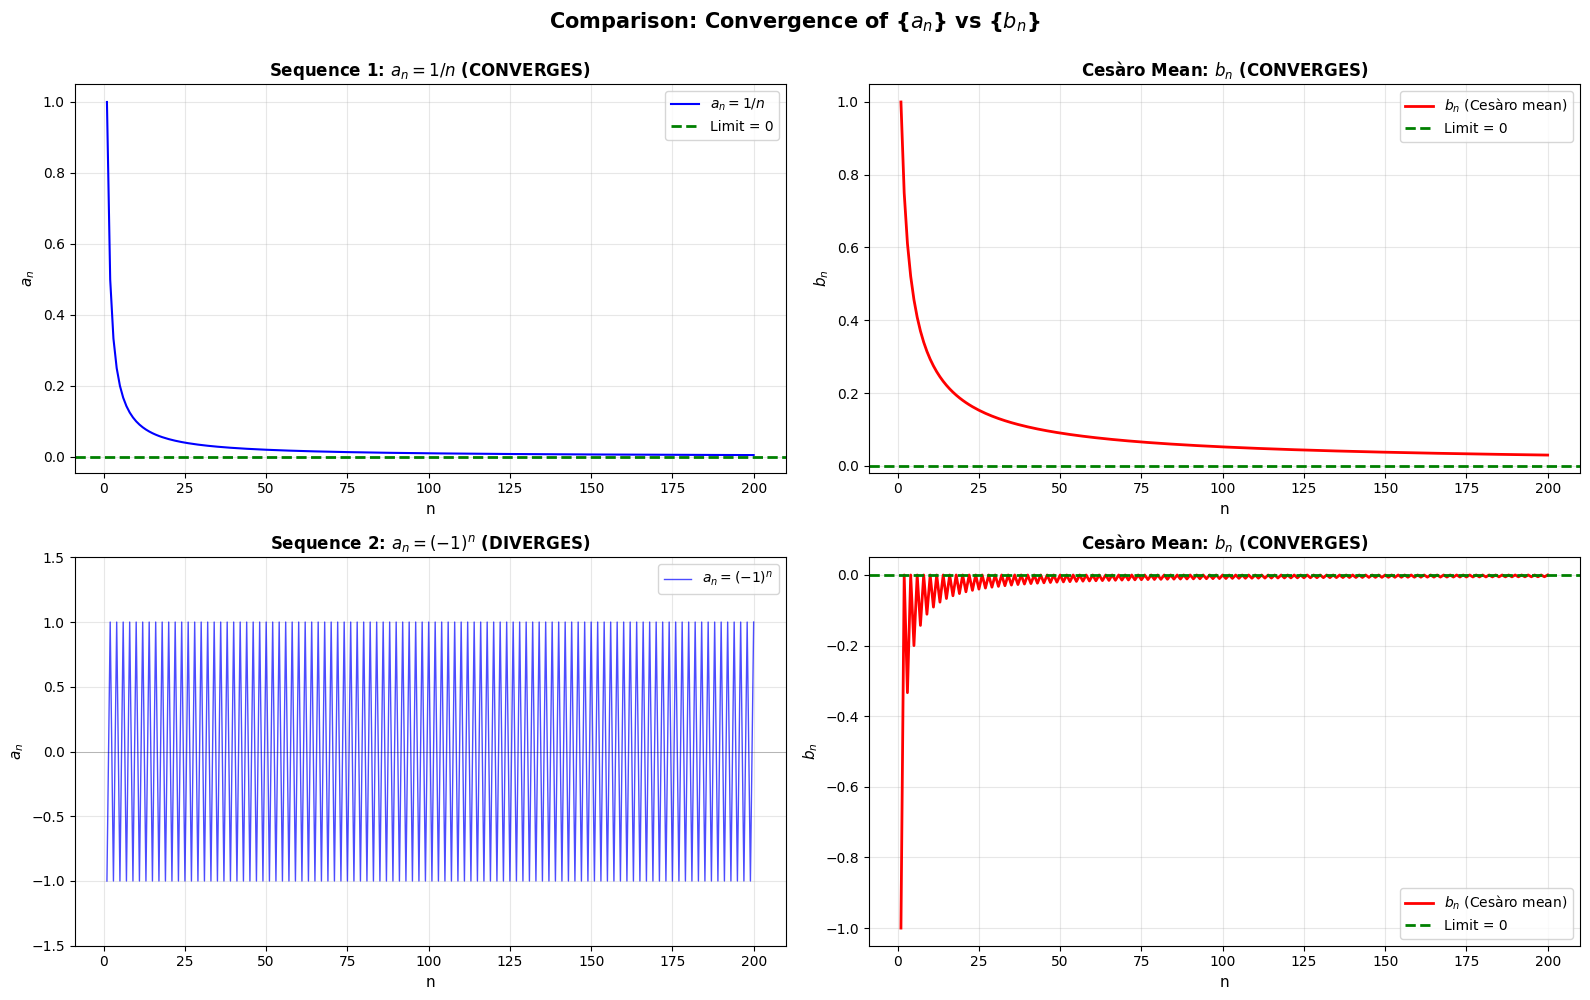

In [15]:

# (b) Relation between convergence of {a_n} and {b_n}
print("\n" + "="*70)
print("(b) RELATION BETWEEN CONVERGENCE OF {a_n} AND {b_n}")
print("="*70)

print("\nAnalysis of Sequence 1: a_n = 1/n")
print("-" * 70)
print("• Original sequence {a_n}:")
print("    a_n = 1/n → 0 as n → ∞")
print("    ✓ The sequence {a_n} CONVERGES to 0")
print("\n• Cesàro mean {b_n}:")
print("    b_n = (1/n) * sum(1/k for k=1 to n)")
print("    b_n = (1/n) * H_n, where H_n is the n-th harmonic number")
print("    Since H_n ~ ln(n), we have b_n ~ ln(n)/n → 0 as n → ∞")
print(f"    b_200 = {b_n_1[-1]:.10f}")
print("    ✓ The Cesàro mean {b_n} CONVERGES to 0")

print("\n" + "-" * 70)
print("Analysis of Sequence 2: a_n = (-1)^n")
print("-" * 70)
print("• Original sequence {a_n}:")
print("    a_n = (-1)^n oscillates between -1 and +1")
print("    ✗ The sequence {a_n} DIVERGES (does not converge)")
print("\n• Cesàro mean {b_n}:")
print("    For even n: sum = 0, so b_n = 0")
print("    For odd n: sum = -1, so b_n = -1/n → 0")
print(f"    b_200 = {b_n_2[-1]:.10f}")
print("    ✓ The Cesàro mean {b_n} CONVERGES to 0")

print("\n" + "="*70)
print("CONCLUSION: RELATIONSHIP BETWEEN {a_n} AND {b_n}")
print("="*70)
print("\n1. If {a_n} converges to L, then {b_n} also converges to L")
print("   (Sequence 1 demonstrates this: both converge to 0)")
print("\n2. If {a_n} diverges, {b_n} may still converge!")
print("   (Sequence 2 demonstrates this: a_n diverges but b_n → 0)")
print("\n3. The Cesàro mean is a 'smoothing' operation:")
print("   • It averages out oscillations")
print("   • It can make divergent sequences converge")
print("   • A sequence that is Cesàro summable may not be convergent")
print("\n4. Mathematical Theorem (Cesàro's Theorem):")
print("   If lim(n→∞) a_n = L, then lim(n→∞) b_n = L")
print("   BUT the converse is NOT true!")
print("="*70)


# Create a comparison plot
fig, axes = plt.subplots(2, 2, figsize=(16, 10))

# Sequence 1: a_n
axes[0, 0].plot(n, a_n_1, 'b-', linewidth=1.5, label=r'$a_n = 1/n$')
axes[0, 0].axhline(y=0, color='green', linestyle='--', linewidth=2, label='Limit = 0')
axes[0, 0].set_xlabel('n', fontsize=11)
axes[0, 0].set_ylabel('$a_n$', fontsize=11)
axes[0, 0].set_title(r'Sequence 1: $a_n = 1/n$ (CONVERGES)', fontsize=12, fontweight='bold')
axes[0, 0].legend(fontsize=10)
axes[0, 0].grid(True, alpha=0.3)

# Sequence 1: b_n
axes[0, 1].plot(n, b_n_1, 'r-', linewidth=2, label=r'$b_n$ (Cesàro mean)')
axes[0, 1].axhline(y=0, color='green', linestyle='--', linewidth=2, label='Limit = 0')
axes[0, 1].set_xlabel('n', fontsize=11)
axes[0, 1].set_ylabel('$b_n$', fontsize=11)
axes[0, 1].set_title(r'Cesàro Mean: $b_n$ (CONVERGES)', fontsize=12, fontweight='bold')
axes[0, 1].legend(fontsize=10)
axes[0, 1].grid(True, alpha=0.3)

# Sequence 2: a_n
axes[1, 0].plot(n, a_n_2, 'b-', linewidth=1, alpha=0.7, label=r'$a_n = (-1)^n$')
axes[1, 0].axhline(y=0, color='black', linestyle='-', linewidth=0.5, alpha=0.3)
axes[1, 0].set_xlabel('n', fontsize=11)
axes[1, 0].set_ylabel('$a_n$', fontsize=11)
axes[1, 0].set_title(r'Sequence 2: $a_n = (-1)^n$ (DIVERGES)', fontsize=12, fontweight='bold')
axes[1, 0].legend(fontsize=10)
axes[1, 0].grid(True, alpha=0.3)
axes[1, 0].set_ylim(-1.5, 1.5)

# Sequence 2: b_n
axes[1, 1].plot(n, b_n_2, 'r-', linewidth=2, label=r'$b_n$ (Cesàro mean)')
axes[1, 1].axhline(y=0, color='green', linestyle='--', linewidth=2, label='Limit = 0')
axes[1, 1].set_xlabel('n', fontsize=11)
axes[1, 1].set_ylabel('$b_n$', fontsize=11)
axes[1, 1].set_title(r'Cesàro Mean: $b_n$ (CONVERGES)', fontsize=12, fontweight='bold')
axes[1, 1].legend(fontsize=10)
axes[1, 1].grid(True, alpha=0.3)

plt.suptitle('Comparison: Convergence of {$a_n$} vs {$b_n$}',
             fontsize=15, fontweight='bold', y=0.995)
plt.tight_layout()
plt.show()



